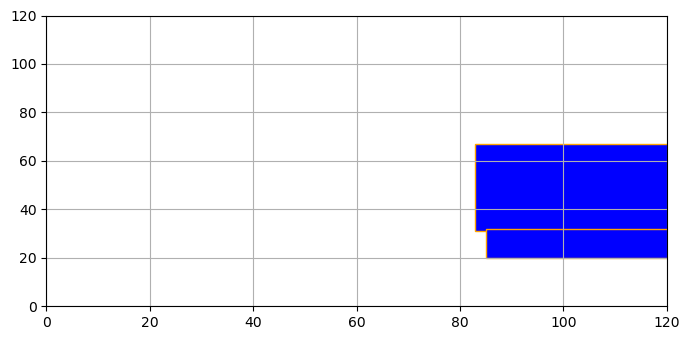

Overlap at south and east edge!
({'xmin': 85, 'ymin': 31, 'width': 38, 'height': 1}, [False, False, False, True, False, True])
{'xmin': 85, 'ymin': 31, 'width': 38, 'height': 1}
Overlap at east edge!


'prone'

In [16]:
from util import *

# a = generate_participant()

arena = {}

layout_zone = {"xmin"   : 0,
               "ymin"   : 0,
               "width"  : 120,
               "height" : 120}

for i in range(2):
    arena[str(i)] = generate_participant()

plot_participants(arena)

a = calculate_overlap(arena['0'], arena['1'])

# print(arena['0'])
# print(arena['1'])

# calculate_layout_area(layout_zone)

# calculate_leeway_coefficient(layout_zone, arena)

print(a)

print(a[0])
calculate_protrusion(layout_zone, arena['0'])

A fully encloses B!


'safe'

In [ ]:
superior_dict = {
    'dict1': {'key1': 'value1', 'key2': 1, 'key3': 2},
    'dict2': {'key1': 'value4', 'key2': 5, 'key3': 2},
    'dict3': {'key1': 'value7', 'key2': 1, 'key3': 2},
}

key_to_retrieve = 'key2'

width = [sub_dict.get(key_to_retrieve) for sub_dict in superior_dict.values()]

key_to_retrieve = 'key3'

height = [sub_dict.get(key_to_retrieve) for sub_dict in superior_dict.values()]

area = sum([a * b for a, b in zip(width, height)])

print(area)

In [2]:
calculate_euclidean_distance(arena['0'], arena['1'])

32.89756829919196

In [3]:
boolean_list = [False, True, False, False]

if any(boolean_list):
    print("At least one value is True.")
else:
    print("All values are False.")

At least one value is True.
